In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. **Import the 2 data sets, ‘insurance’ and ‘heart’.**

In [4]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. **For the ‘heart’ data frame, rename the column ‘target’ to’ heart disease’.**

In [9]:
heart_df.rename(columns={'target':'heart disease'},inplace = True)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3. **In the ‘insurance’ data frame, map encode the gender categories in the following procedure:**

In [13]:
#checking the categories
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
#fucntion for map encoding gender column
def gender_encode(x):
    if x == 'male':
        return 1
    else:
        return 0


In [18]:
#applying the encoding function
insurance_df['sex'] = insurance_df['sex'].apply(gender_encode)

**4. Explore each data frame using at least 2 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell.**

In [19]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# bivariate analysis function
def bivariate_analysis(dataset,var1,var2):
    #getting the relationship between the target variable and categorical independent variables
    #crosstab
    category = pd.crosstab(dataset[var1],dataset[var2])

    #stacked bar plot to show propotion of approved and unapproved loans.
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked=True,figsize = (4,4))
    plt.xlabel(var1)
    plt.ylabel('Percentage')
    plt.legend(loc =4)
    plt.show()
    

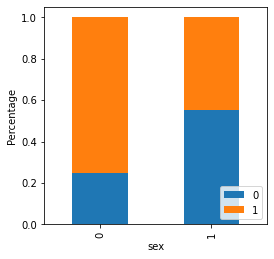

In [27]:
# relationship between gender and heart_disease
bivariate_analysis(heart_df,'sex','heart disease')

There is a higher perecentage of males than females who have a higher incidence of heart_disease.

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
